In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict,Literal
from langchain_google_genai import GoogleGenerativeAI
from pydantic import BaseModel, Field
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
model = GoogleGenerativeAI(model="gemini-1.5-pro")

In [4]:
class QuadState(TypedDict):
    a: int
    b: int
    c: int
    
    equa: str
    d: float
    result: str

In [5]:
def show_equation(state: QuadState) -> QuadState:
    equation = f'{state["a"]}x^2 + {state["b"]}x + {state["c"]} = 0'
    return {'equa': equation}

def cal_d(state: QuadState) -> QuadState:
    a, b, c = state['a'], state['b'], state['c']
    d = (b**2) - (4*a*c)
    return {'d': d}

def real_roots(state: QuadState) -> QuadState:
    root1 = (-state['b']+state['d']**0.5) / (2*state['a'])
    root2 = (-state['b']-state['d']**0.5) / (2*state['a'])
    
    result = f'The real roots are {root1} and {root2}'
    return {'result': result}

def repeated_roots(state: QuadState) -> QuadState:
    root = -state['b'] / (2*state['a'])
    result = f'The repeated root is {root}'
    return {'result': result}

def no_real_roots(state: QuadState) -> QuadState:
    result = 'There are no real roots'
    return {'result': result}

def check_condition(state: QuadState) -> Literal["real_roots", "repeated_roots", "no_real_roots"]:
    if state['d'] > 0:
        return "real_roots"
    elif state['d'] == 0:
        return "repeated_roots"
    else:
        return "no_real_roots"

In [18]:
graph = StateGraph(QuadState)

graph.add_node('show_equation',show_equation)
graph.add_node('cal_d',cal_d)
graph.add_node('real_roots',real_roots)
graph.add_node('repeated_roots',repeated_roots)
graph.add_node('no_real_roots',no_real_roots)

graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'cal_d')
graph.add_conditional_edges('cal_d', check_condition)
graph.add_edge('real_roots', END)
graph.add_edge('repeated_roots', END)
graph.add_edge('no_real_roots', END)

workflow = graph.compile()

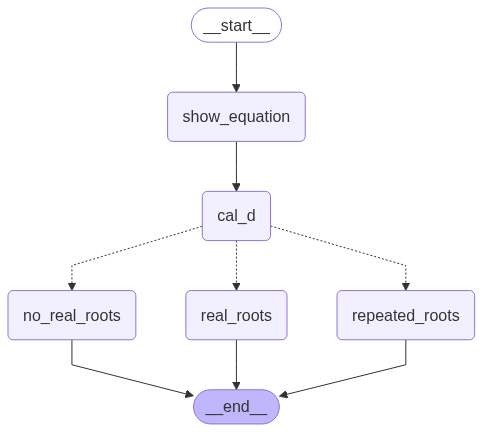

In [19]:
workflow

In [20]:
workflow.invoke({'a': 1, 'b': -3, 'c': 2})

{'a': 1,
 'b': -3,
 'c': 2,
 'equa': '1x^2 + -3x + 2 = 0',
 'd': 1,
 'result': 'The real roots are 2.0 and 1.0'}